<a href="https://colab.research.google.com/github/Kavyasreegurram/kavya/blob/main/APPLE_STOCK_PROGNOSTICS_USING_Deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STOCK PRICE PROGNOSTICS

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import zipfile

# Extract the files first
with zipfile.ZipFile('/content/archive (2).zip', 'r') as zip_ref:
  zip_ref.extractall('/content')

# Get the actual CSV file name from the zip archive
with zipfile.ZipFile('/content/archive (2).zip', 'r') as zip_ref:
    csv_file_name = zip_ref.namelist()[0]  # Assuming the CSV file is the first file in the archive

# Read the CSV file using the correct file name
dataset_train = pd.read_csv('/content/' + csv_file_name)

dataset_train.shape

(2475, 7)

In [ ]:
dataset_train.head()
dataset_train.isna().sum()
dataset_train.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.318729,234684800
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,16.938305,392467600
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,17.030676,412610800
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,16.908880,317209200
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,17.015959,258529600


In [ ]:
print(dataset_train.to_string())
display(dataset_train)

            Date        Open        High         Low       Close   Adj Close      Volume
0     2014-01-02   19.845715   19.893929   19.715000   19.754642   17.318729   234684800
1     2014-01-03   19.745001   19.775000   19.301071   19.320715   16.938305   392467600
2     2014-01-06   19.194643   19.528570   19.057142   19.426071   17.030676   412610800
3     2014-01-07   19.440001   19.498571   19.211430   19.287144   16.908880   317209200
4     2014-01-08   19.243214   19.484285   19.238930   19.409286   17.015959   258529600
5     2014-01-09   19.528570   19.530714   19.119642   19.161428   16.798664   279148800
6     2014-01-10   19.279642   19.314285   18.968214   19.033571   16.686569   304976000
7     2014-01-13   18.925358   19.375000   18.924286   19.133215   16.773926   378492800
8     2014-01-14   19.222143   19.526072   19.202143   19.513929   17.107697   332561600
9     2014-01-15   19.768572   20.007143   19.702143   19.905714   17.451174   391638800
10    2014-01-16   19

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.318729,234684800
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,16.938305,392467600
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,17.030676,412610800
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,16.908880,317209200
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,17.015959,258529600
...,...,...,...,...,...,...,...
2470,2023-10-25,171.880005,173.059998,170.649994,171.100006,170.874893,57157000
2471,2023-10-26,170.369995,171.380005,165.669998,166.889999,166.670425,70625300
2472,2023-10-27,166.910004,168.960007,166.830002,168.220001,167.998672,58499100
2473,2023-10-30,169.020004,171.169998,168.869995,170.289993,170.065933,51131000


Exploratory Data Analysis (EDA)

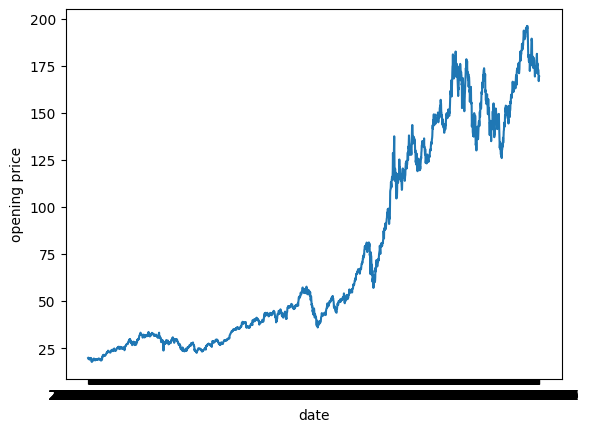

In [ ]:
import matplotlib.pyplot as plt # Make sure matplotlib is imported

X = dataset_train['Date']
y_dataset_train = dataset_train['Open'] # Assign the 'Open' column to y_dataset_train
plt.plot(X, y_dataset_train) # Use X and y_dataset_train for plotting
plt.xlabel('date')
plt.ylabel('opening price')
plt.show()


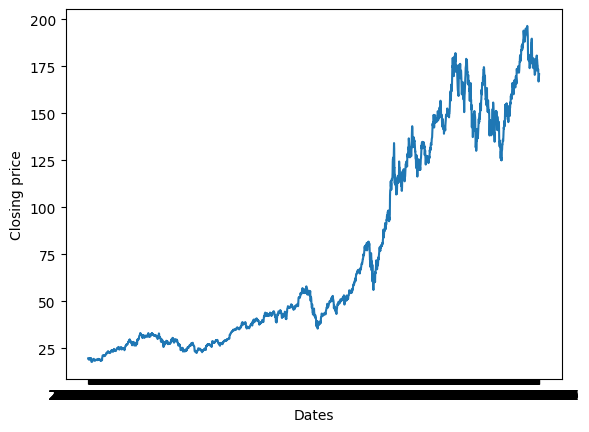

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a CSV file named 'your_data.csv'
# Replace 'your_data.csv' with the actual file path
dataset_train = pd.read_csv('/content/apple_stock.csv')

X = dataset_train['Date']
y = dataset_train['Close']
plt.plot(X,y)
plt.xlabel('Dates')
plt.ylabel('Closing price')
plt.show()

In [ ]:
training_set= dataset_train.iloc[:,1:2].values

Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X= MinMaxScaler(feature_range=(0,1))
training_set_scaled_prices= X.fit_transform(training_set)

In [ ]:
import numpy as np
X_train = []
Y_train = []
for i in range(60,1575):
  X_train.append(training_set_scaled_prices[i-60:i,0])
  Y_train.append(training_set_scaled_prices[i,0])
X_train,Y_train=np.array(X_train),np.array(Y_train)
X_train.shape


(1515, 60)

In [ ]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1515, 60, 1)

BUILDING RNN

In [ ]:
#import keraslibraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
# initialization
rnn=Sequential()
#  add first LSTM layer
rnn.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
rnn.add(Dropout(0.25))
#add second LSTM layer
rnn.add(LSTM(units=50,return_sequences=True))
rnn.add(Dropout(0.25))
#add third LSTM layer
rnn.add(LSTM(units=50,return_sequences=True))
rnn.add(Dropout(0.25))
#add fourth LSTM layer
rnn.add(LSTM(units=50))
rnn.add(Dropout(0.25))
#adding output layer
rnn.add(Dense(units=1))
#compile RNN #SGD #RMSPROP
rnn.compile(optimizer='adam',loss="mean_squared_error")
rnn.fit(X_train,Y_train,epochs=50,batch_size=32)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


48/48 ━━━━━━━━━━━━━━━━━━━━ 13s 121ms/step - loss: 0.0050
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 4.6024e-04
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - loss: 4.0796e-04
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - loss: 4.1976e-04
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 138ms/step - loss: 3.7826e-04
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - loss: 3.7851e-04
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 139ms/step - loss: 2.9701e-04
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 99ms/step - loss: 2.6612e-04
Epoch 9/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 141ms/step - loss: 2.7763e-04
Epoch 10/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - loss: 4.2158e-04
Epoch 11/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 139ms/step - loss: 3.5878e-04
Epoch 12/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 2.7375e-04
Epoch 13/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - loss: 2.1191e-04
Epoch 14/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - loss: 2.4862e-04
Epoch 15/50
48/48 ━━━

In [ ]:
#load test dataset
dataset_test=pd.read_csv('/content/apple_stock.csv')
#load test dataset
dataset_test=pd.read_csv('/content/apple_stock.csv')
test_sp=dataset_test.iloc[:,[1,2]].values
dataset_test.shape
df_combined=pd.concat([dataset_test['Open'],dataset_test['Open']],axis=0)
df_inputs=df_combined[len(df_combined)-len(dataset_test)-60:].values
df_inputs=df_inputs.reshape(-1,1)
df_inputs=X.transform(df_inputs)
X_test=[] # Initialize X_test as a list

for i in range(60,312):
  X_test.append(df_inputs[i-60:i,0]) # Append data to the list

# Convert X_test to a NumPy array after the loop
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

# Make predictions outside the loop to avoid repetitive calculations
predicted_stock_price=rnn.predict(X_test)
predicted_stock_price=X.inverse_transform(predicted_stock_price)
print(predicted_stock_price)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
[[150.01088   ]
 [142.49469   ]
 [127.28685   ]
 [106.30698   ]
 [ 82.70046   ]
 [ 59.444042  ]
 [ 38.805237  ]
 [ 22.188763  ]
 [ 10.187078  ]
 [  2.7409723 ]
 [ -0.67363673]
 [ -0.8767874 ]
 [  1.1831299 ]
 [  4.573005  ]
 [  8.509594  ]
 [ 12.403813  ]
 [ 15.872473  ]
 [ 18.70532   ]
 [ 20.787182  ]
 [ 22.117908  ]
 [ 22.788792  ]
 [ 22.934584  ]
 [ 22.7155    ]
 [ 22.284016  ]
 [ 21.76328   ]
 [ 21.243757  ]
 [ 20.792635  ]
 [ 20.439455  ]
 [ 20.199184  ]
 [ 20.07198   ]
 [ 20.03743   ]
 [ 20.074186  ]
 [ 20.160858  ]
 [ 20.272902  ]
 [ 20.375265  ]
 [ 20.444063  ]
 [ 20.46032   ]
 [ 20.428148  ]
 [ 20.355698  ]
 [ 20.24908   ]
 [ 20.132048  ]
 [ 20.019646  ]
 [ 19.928867  ]
 [ 19.868525  ]
 [ 19.840807  ]
 [ 19.839584  ]
 [ 19.852873  ]
 [ 19.877935  ]
 [ 19.911398  ]
 [ 19.952036  ]
 [ 19.987823  ]
 [ 20.008612  ]
 [ 20.008951  ]
 [ 19.996681  ]
 [ 19.978306  ]
 [ 19.960684  ]
 [ 19.954988  ]
 [ 19.969713  ]
 [ 20.01069   ]
 [ 20.06825   ]
 [

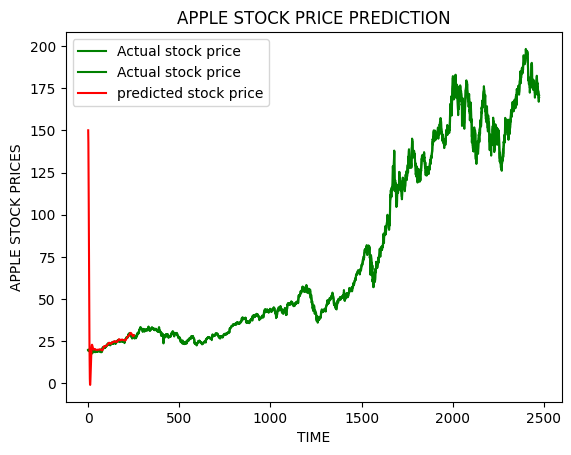

In [ ]:
# visualization
plt.plot(test_sp,color='green',label='Actual stock price')
plt.plot(predicted_stock_price,color='red',label='predicted stock price')
plt.title('APPLE STOCK PRICE PREDICTION')
plt.xlabel('TIME')
plt.ylabel('APPLE STOCK PRICES')
plt.legend()
plt.show()

